In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
try:
    df = pd.read_csv('data/Salary_Data.csv')
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("CSV file not found. Please check the file path.")

CSV file loaded successfully.


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [8]:
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [9]:
df['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [10]:
df.shape

(30, 2)

In [11]:
df.shape?

Type:        property
String form: <property object at 0x0000022A1C1E6BD0>
Docstring:  
Return a tuple representing the dimensionality of the DataFrame.

See Also
--------
ndarray.shape : Tuple of array dimensions.

Examples
--------
>>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
>>> df.shape
(2, 2)

>>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4],
...                    'col3': [5, 6]})
>>> df.shape
(2, 3)

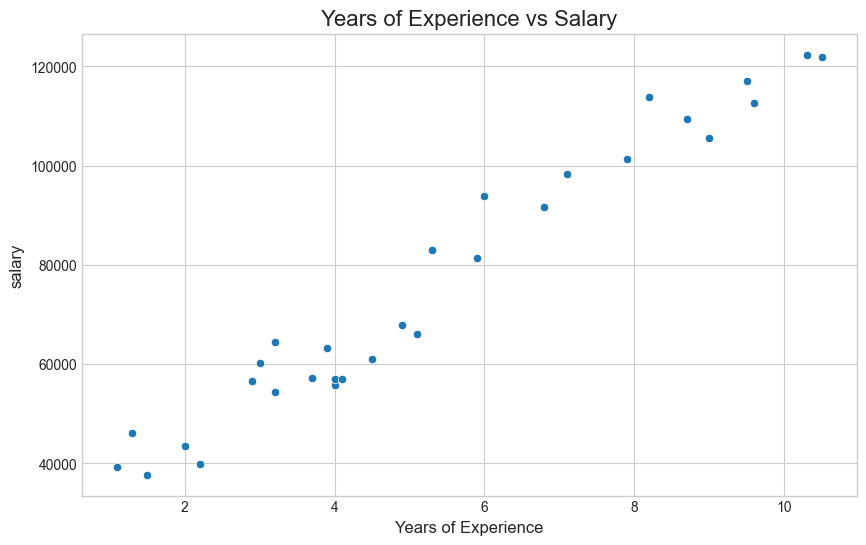

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Years of Experience vs Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('salary',fontsize=12)
plt.show()


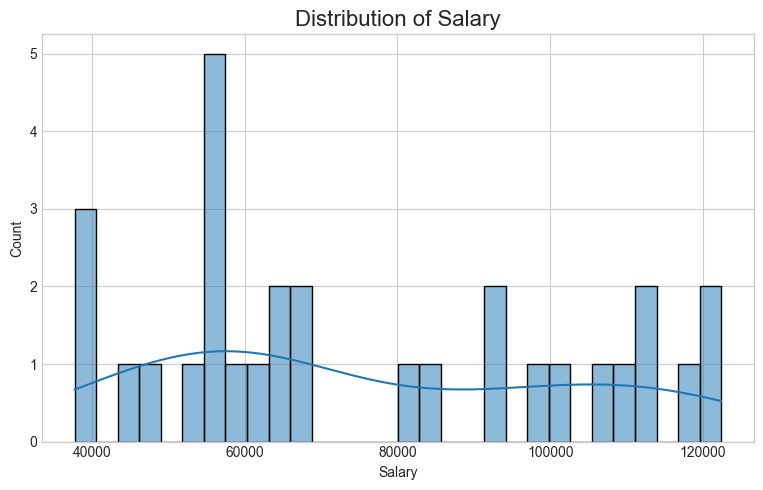

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Distribution of Salary', fontsize=16)
plt.tight_layout()
plt.show()

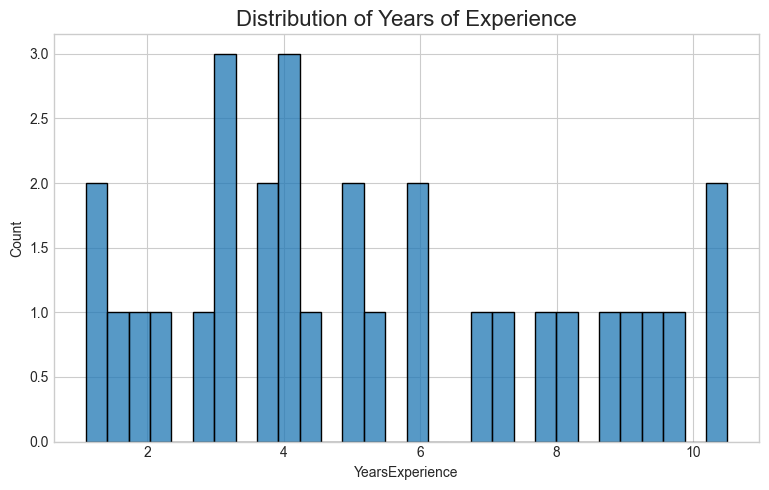

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.histplot(df['YearsExperience'], kde=False, bins=30)
plt.title('Distribution of Years of Experience', fontsize=16)
plt.tight_layout()
plt.show()

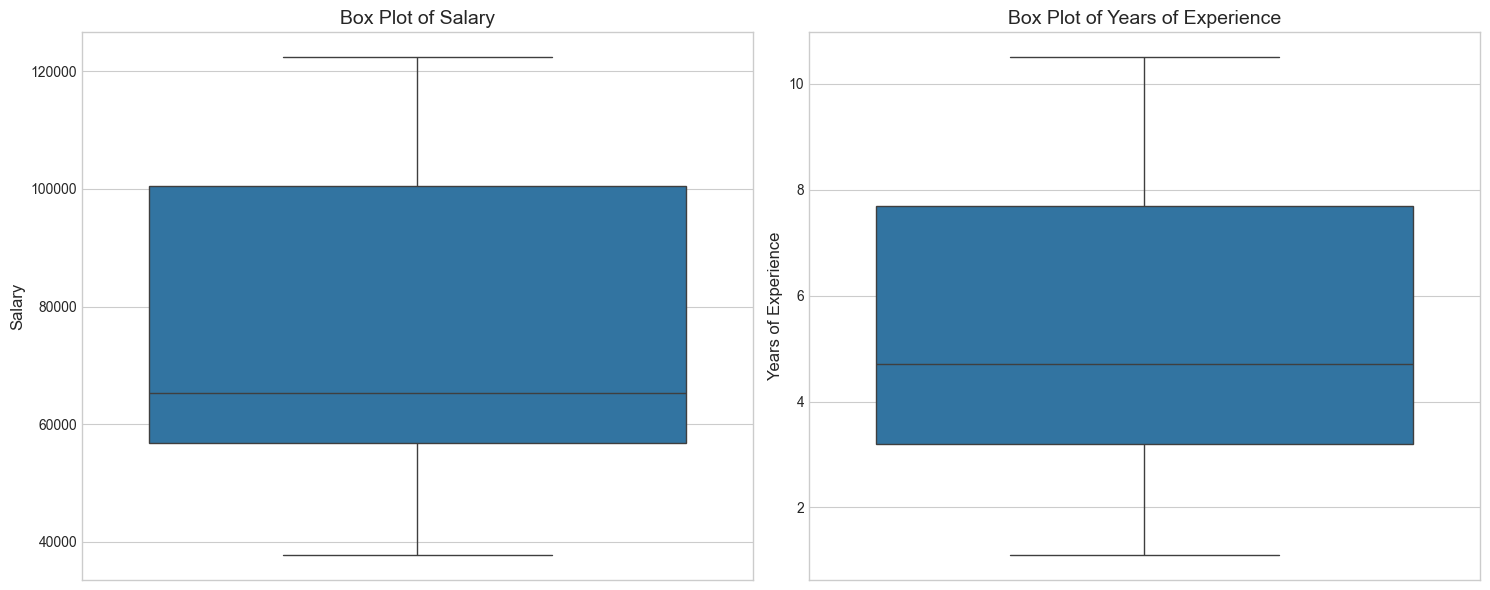

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y='Salary', data=df)
plt.title('Box Plot of Salary', fontsize=14)
plt.ylabel('Salary', fontsize=12)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=df['YearsExperience'])
plt.title('Box Plot of Years of Experience', fontsize=14)
plt.ylabel('Years of Experience', fontsize=12)

plt.tight_layout()
plt.show()


In [16]:
correlation_matrix = df.corr()
print("correlation_matrix:")
print(correlation_matrix)

correlation_matrix:
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


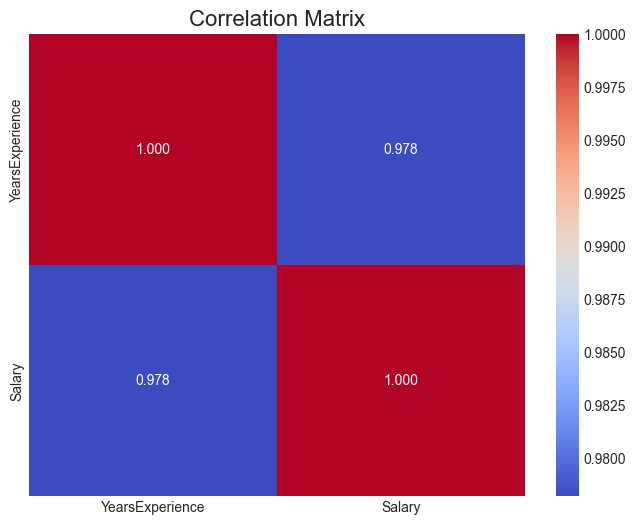

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

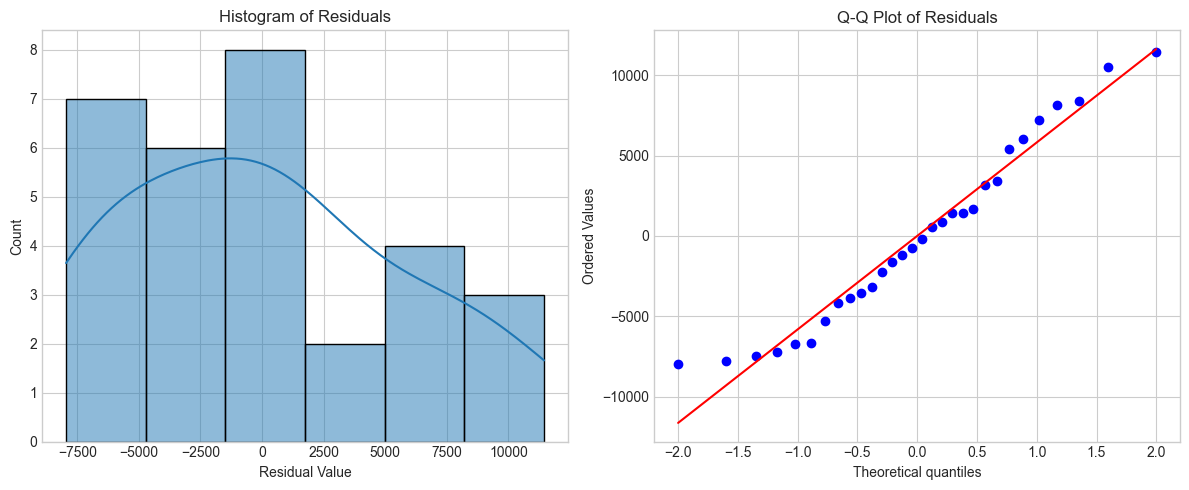

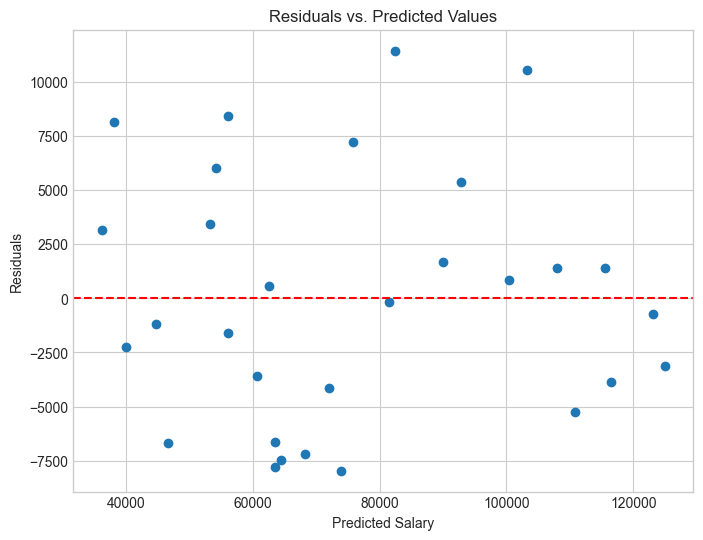

In [18]:
from sklearn.linear_model import LinearRegression

# We'll use the FULL dataset for this EDA step for simplicity
X = df[['YearsExperience']]
y = df['Salary']

# Create and fit the model
model_for_eda = LinearRegression()
model_for_eda.fit(X, y)

# Calculate the residuals (errors)
residuals = y - model_for_eda.predict(X)

# Cell (New): Check Assumption 2: Normality of Residuals
# We can do this with a histogram or a Q-Q plot.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')

# A Q-Q plot is a better way to check for normality
import scipy.stats as stats
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Cell (New): Check Assumption 3: Homoscedasticity (Constant Variance)
# We plot the predicted values against the residuals.
# We are looking for a random cloud of points with no clear pattern.
plt.figure(figsize=(8, 6))
plt.scatter(model_for_eda.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()

In [19]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 YearsExperience    0
Salary             0
dtype: int64


In [20]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [21]:
# Cell 10: Define our feature (X) and target (y)
# X should be a 2D array or DataFrame, which is why we use double brackets [[]]
X = df[['YearsExperience']]

# y should be a 1D array or Series
y = df['Salary']

# Print the shapes to confirm
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (30, 1)
Shape of y: (30,)


In [22]:
# Cell 11: Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
# random_state is a seed value, ensuring we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 12: Check the shapes of the new sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24, 1)
Shape of X_test: (6, 1)
Shape of y_train: (24,)
Shape of y_test: (6,)


In [23]:
y=df['Salary']

In [24]:
print(type(y))

<class 'pandas.core.series.Series'>


In [25]:
print(y.shape)

(30,)


In [26]:
X = df[['YearsExperience']]

print(type(X))


print(X.shape)

print(X.head())


<class 'pandas.core.frame.DataFrame'>
(30, 1)
   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Model score (R^2):", model.score(X_test, y_test))
print("Model score (R^2) on training set:", model.score(X_train, y_train))
print("Model predictions on test set:", model.predict(X_test))
print("Model predictions on training set:", model.predict(X_train))
print("Model predictions on the entire dataset:", model.predict(X))
print("Model training completed successfully.")

Model coefficients: [9423.81532303]
Model intercept: 25321.583011776813
Model score (R^2): 0.9024461774180497
Model score (R^2) on training set: 0.9645401573418146
Model predictions on test set: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
Model predictions on training set: [122386.880839   107308.77632215  63016.8443039   35687.77986711
  46053.97672244  73383.04115923  52650.64744857  63959.2258362
  63016.8443039   99769.72406372  37572.54293172  39457.30599632
 110135.92091906  44169.21365784  92230.6718053  114847.82858057
  80922.09341766 124271.6439036   89403.52720839  55477.79204548
  62074.4627716   67728.75196542  81864.47494996  53593.02898087]
Model predictions on the entire dataset: [ 35687.77986711  37572.54293172  39457.30599632  44169.21365784
  46053.97672244  52650.64744857  53593.02898087  55477.79204548
  55477.79204548  60189.69970699  62074.4627716   63016.8443039
  63016.8443039   63959.2258362   67728.751965

In [28]:
# Cell 16: Get the learned coefficients
# The intercept (b0)
intercept = model.intercept_
# The slope (b1 for YearsExperience)
coefficient = model.coef_[0] # .coef_ is an array, so we get the first element

print(f"The intercept (b0) is: {intercept:.2f}")
print(f"The coefficient for YearsExperience (b1) is: {coefficient:.2f}")

print(f"\nThe equation of our model is: Salary = {intercept:.2f} + {coefficient:.2f} * YearsExperience")

The intercept (b0) is: 25321.58
The coefficient for YearsExperience (b1) is: 9423.82

The equation of our model is: Salary = 25321.58 + 9423.82 * YearsExperience


In [29]:
y_pred = model.predict(X_test)

In [30]:
results_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
results_df['Difference'] = results_df['Actual Salary'] - results_df['Predicted Salary'] 
print("Predictions on the test set:")
results_df

Predictions on the test set:


,Actual Salary,Predicted Salary,Difference
27,112635.0,115790.210113,-3155.210113
15,67938.0,71498.278095,-3560.278095
23,113812.0,102596.868661,11215.131339
17,83088.0,75267.804224,7820.195776
8,64445.0,55477.792045,8967.207955
9,57189.0,60189.699707,-3000.699707


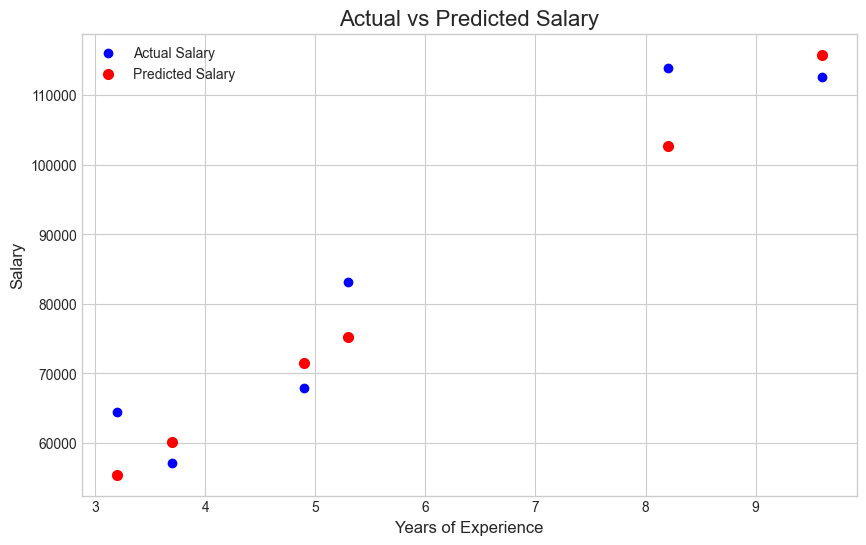

In [33]:
plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary')

plt.title('Actual vs Predicted Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 6286.45
Mean Squared Error (MSE): 49830096.86
Root Mean Squared Error (RMSE): 7059.04
R-squared (R^2): 0.90


In [38]:
new_experience = 7.5

predicted_salary = model.predict([[new_experience]])

print(f"Predicted salary for {new_experience} years of experience: ${predicted_salary[0]:.2f}")

Predicted salary for 7.5 years of experience: $96000.20


c:\Users\DOWNLOAD\.virtualenvs\p\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
